In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

#### 从散点微地震数据，插值获得连续的r-t曲线

In [6]:
def create_time_range(df):
    
    # create a dataframe in the range of df's begin & end time (for HF data)
    
    begin_time = df.loc[0, 'time']
    end_time = df.iloc[-1, 0]
    time_range = np.arange(begin_time, end_time+1)
    whole_time = pd.DataFrame(time_range, columns=['time'])
    
    return whole_time

# def threshold_func(x):
    
#     # take a x-(60,1) in and output a value
    
#     threshold_value = x.max() * 0.9    # 90% of the data
#     value = x[np.where(x<threshold_value)].max()
#     return value
    
def rt_relation(ms, hf):
    
    # merge MS data in the range of HF time duration, finally return the label dataframe
    
    temp = create_time_range(hf)
    ms = ms[ms['time'] >= hf.loc[0, 'time']]
    temp2 = pd.merge(ms, temp, on='time',how='outer').sort_values('time')
    df = pd.DataFrame(temp2, columns=['time', 'distance'])
    df.reset_index(drop=True, inplace=True)
    
    # fill NaN values i.e. 插值
    df.loc[0, 'distance'] = 0.0
#     df.fillna(method='ffill', inplace=True)    # 脉冲——永远用前一个值给后面的NaN赋值
    df['distance'].interpolate('linear', axis=0, inplace=True)    # 线性插值
    
    # rolling time window --1min to get the triggering front at an interval of 1min
#     temp_series = df['distance']
#     temp_roll = temp_series.rolling(6, center=True).apply(threshold_func, raw=True)
# #     temp_roll = temp_series.groupby(temp_series.index // 60).apply(threshold_func)
#     temp_roll[0] = 0.0
#     temp_roll = temp_roll.fillna(method='ffill')
#     df_new = pd.DataFrame({'time':df['time'], 'distance':temp_roll})
    return df

#### 读取指定段的（微地震散点， 水力压裂）数据
第32段（H5-5 stage10 有问题！在压裂前就检测到了微地震）

In [7]:
def get_stage_ms_hf(stage_number):
    ms_path = '../dbscan_MS_data/'
    hf_path = '../stage_wise_HF_data/'
    ms_file = ms_path + f'H5_{stage_number}.csv'
    hf_file = hf_path + f'H5_HF_{stage_number}.csv'
    ms_df = pd.read_csv(ms_file, index_col=0)
    hf_df = pd.read_csv(hf_file, index_col=0)
    ms_df["time"] = pd.to_datetime(ms_df["time"], format="%Y-%m-%d %H:%M:%S") # 微地震散点数据
    hf_df["time"] = pd.to_datetime(hf_df["time"], format="%Y-%m-%d %H:%M:%S") # 压裂数据（连续）
    ms_df = ms_df[ms_df['time'] >= hf_df.loc[0, 'time']]
    return (ms_df, hf_df)

In [259]:
ms_number_counter = []
for i in range(73):
    ms_dataframe, _ = get_stage_ms_hf(i)
    total_ms_number = len(ms_dataframe.index)
    ms_number_counter.append(total_ms_number)

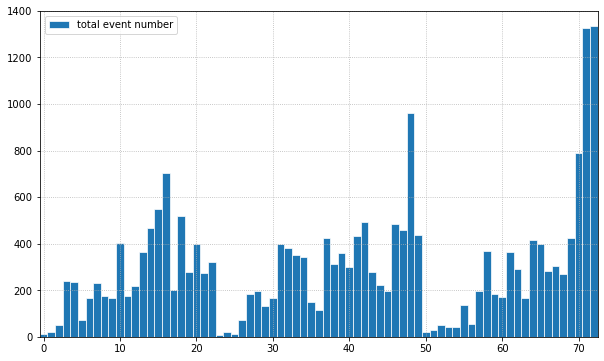

In [283]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(np.arange(73), ms_number_counter, width=1, edgecolor="white", linewidth=0.7, label='total event number')
ax.grid(linestyle=':')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend()

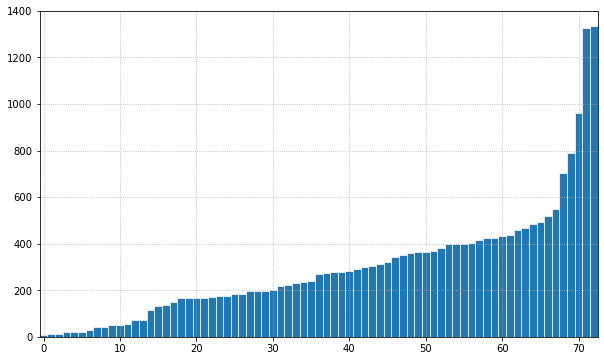

In [281]:
ms_number_counter_sorted = np.sort(ms_number_counter)
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(np.arange(73), ms_number_counter_sorted, width=1, edgecolor="white", linewidth=0.7)
ax.grid(linestyle=':')
ax.autoscale(enable=True, axis='x', tight=True)

In [8]:
ms, hf = get_stage_ms_hf(45)
display(ms, hf)

,Well,Stage,time,x,y,z,Magnitude,distance
0,H5-5,23,2017-04-18 08:27:47,89.21,-796.0,3164.9,-2.10,138.11
1,H5-5,23,2017-04-18 08:27:57,-225.59,-737.9,3232.6,-1.73,190.35
2,H5-5,23,2017-04-18 08:34:41,131.71,-642.8,3141.1,-1.57,149.69
3,H5-5,23,2017-04-18 08:35:13,90.71,-704.1,3125.8,-2.08,133.84
4,H5-5,23,2017-04-18 08:35:54,-237.19,-690.1,3152.4,-1.79,215.41
...,...,...,...,...,...,...,...,...
193,H5-5,23,2017-04-18 11:01:19,-8.09,-576.6,3231.8,-1.21,52.00
194,H5-5,23,2017-04-18 11:02:33,-230.79,-798.7,3349.5,-1.39,223.81
195,H5-5,23,2017-04-18 11:03:07,-51.89,-785.3,3389.0,-1.65,176.18
196,H5-5,23,2017-04-18 11:03:08,-51.89,-785.3,3389.0,-1.65,176.18


,time,pressure,rate,total_rate,prop,total_prop
0,2017-04-18 08:07:20,36.60,0.0,0.00,0.0,0.00
1,2017-04-18 08:07:21,36.60,0.0,0.00,0.0,0.00
2,2017-04-18 08:07:22,36.60,0.0,0.00,0.0,0.00
3,2017-04-18 08:07:23,36.60,0.0,0.00,0.0,0.00
4,2017-04-18 08:07:24,36.60,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...
11335,2017-04-18 11:16:19,0.19,0.0,1840.75,0.0,122.32
11336,2017-04-18 11:16:20,0.19,0.0,1840.75,0.0,122.32
11337,2017-04-18 11:16:21,0.19,0.0,1840.75,0.0,122.32
11338,2017-04-18 11:16:22,0.19,0.0,1840.75,0.0,122.32


In [434]:
ms, hf = get_stage_ms_hf(0)

# 全部转化为 Unix 时间戳
ms['time'] = ms['time'].apply(lambda x: (x-pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))
hf['time'] = hf['time'].apply(lambda x: (x-pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))

10


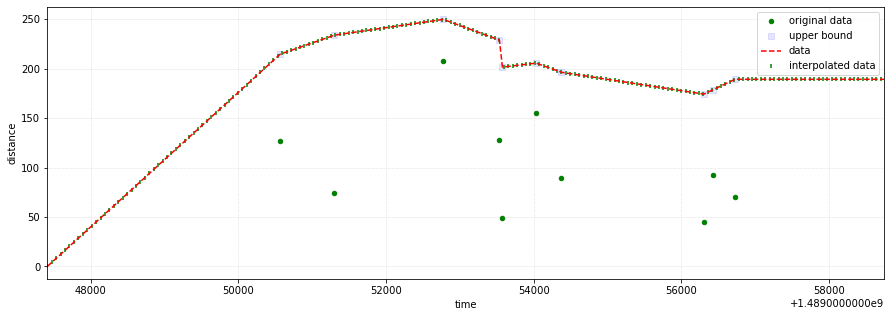

In [435]:
from tsmoothie.smoother import LowessSmoother

print(len(ms.index))
# -----plot the figure-----
fig, ax = plt.subplots(figsize=(15,5))
ms.plot.scatter('time', 'distance', ax=ax, c='g', label='original data')

# LowessSmoother uses LOWESS (locally-weighted scatterplot smoothing)
smoother = LowessSmoother(smooth_fraction=0.3, iterations=1)

smoother.smooth(ms['distance'])
low, up = smoother.get_intervals('prediction_interval')
low, up = low.T, up.T

ms['distance'] = up
ms.plot.scatter('time', 'distance', ax=ax, c='b', alpha=0.1, marker='s', s=30, label='upper bound')

# -----merge data (interpolate)-----
label = rt_relation(ms, hf)
label.plot('time', 'distance', ax=ax, c='r', linestyle='--', label='data')
label.iloc[::60,:].plot.scatter('time', 'distance', ax=ax, c='g', marker='|', label='interpolated data')

ax.grid(color='grey', linestyle=':', linewidth=0.5, alpha=0.5)
ax.autoscale(enable=True, axis='x', tight=True)

In [401]:
from tsmoothie.smoother import LowessSmoother

def make_rt_plot(stage):
    ms, hf = get_stage_ms_hf(stage)
    ms['time'] = ms['time'].apply(lambda x: (x-pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))
    hf['time'] = hf['time'].apply(lambda x: (x-pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))
    fig, ax = plt.subplots(figsize=(15,5))
    ms.plot.scatter('time', 'distance', ax=ax, c='g', label='original data', alpha=0.8)
    
    # 不同微地震数目的段，应采用不同的平滑器
    ms_number = len(ms.index)
    if ms_number <= 50:
        smoother = LowessSmoother(smooth_fraction=0.3, iterations=1)
    if ms_number > 50 and ms_number <= 100:
        smoother = LowessSmoother(smooth_fraction=0.25, iterations=1)
    if ms_number > 100 and ms_number <= 500:
        smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
    if ms_number > 500:
        smoother = LowessSmoother(smooth_fraction=0.15, iterations=1)
    
    # 获得 upper bound
    smoother.smooth(ms['distance'])
    low, up = smoother.get_intervals('prediction_interval')
    low, up = low.T, up.T
    ms['distance'] = up
    ms.plot.scatter('time', 'distance', ax=ax, c='b', alpha=0.1, marker='s', s=30, edgecolors='none', label='upper bound')
    
    # merge 数据，获得整个压裂时间内的微地震分布，并进行60s的降采样
    label = rt_relation(ms, hf)
    label_downsample = label.iloc[::60, :]
    label_downsample.plot('time', 'distance', ax=ax, c='r', linestyle='--', label='interpolated data')
    datapoints = len(label_downsample.index)
    
    ax.set_title(f'Total datapoints = {datapoints}')
    ax.grid(color='grey', linestyle=':', linewidth=0.5, alpha=0.5)
    ax.autoscale(enable=True, axis='x', tight=True)
    ax.legend(loc='upper left')
    
    fig.savefig(r'K:\Sichuan\H5\outputs_smoothed\H5_platform_stage_{}_73.png'.format(stage), 
                dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.close(fig)
    del ms, hf, label, label_downsample
    print('Successfully save figure {}/73.'.format(stage+1))

In [425]:
# for i in range(32):
#     make_rt_plot(i)
# print('done!')

# for i in range(33, 73):
#     make_rt_plot(i)
# print('done!')

In [9]:
from tsmoothie.smoother import LowessSmoother

def save_resampled_dataframe(stage):
    ms, hf = get_stage_ms_hf(stage)
    hf_downsample = hf.iloc[::60, :]
    hf_downsample.to_csv(f'K:\\Sichuan\\H5\\resampled_feature_data\\resampled_feature_{stage}.csv', index=False)
    
    ms['time'] = ms['time'].apply(lambda x: (x-pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))
    hf['time'] = hf['time'].apply(lambda x: (x-pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))
    
    # 不同微地震数目的段，应采用不同的平滑器
    ms_number = len(ms.index)
    if ms_number <= 50:
        smoother = LowessSmoother(smooth_fraction=0.3, iterations=1)
    if ms_number > 50 and ms_number <= 100:
        smoother = LowessSmoother(smooth_fraction=0.25, iterations=1)
    if ms_number > 100 and ms_number <= 500:
        smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
    if ms_number > 500:
        smoother = LowessSmoother(smooth_fraction=0.15, iterations=1)
    
    # 获得 upper bound
    smoother.smooth(ms['distance'])
    low, up = smoother.get_intervals('prediction_interval')
    low, up = low.T, up.T
    ms['distance'] = up
    
    # merge 数据，获得整个压裂时间内的微地震分布，并进行60s的降采样
    label = rt_relation(ms, hf)
    label_downsample = label.iloc[::60, :]
    label_downsample = label_downsample.copy()
    label_downsample.loc[:, 'time'] = pd.to_datetime(label_downsample.loc[:, 'time'], unit='s')
    label_downsample.to_csv(f'K:\\Sichuan\\H5\\resampled_label_data\\resampled_label_{stage}.csv', index=False)
    
    print(f'Done for stage: {stage}.')

In [10]:
# for i in range(32):
#     save_resampled_dataframe(i)
# print('done!')

# for i in range(33, 73):
#     save_resampled_dataframe(i)
# print('done!')
save_resampled_dataframe(45)

Done for stage: 45.


#### *所有的列表循环*

In [11]:
def get_stage_feature_label(stage):
    feature_path = f'K:\\Sichuan\\H5\\resampled_feature_data\\resampled_feature_{stage}.csv'
    label_path = f'K:\\Sichuan\\H5\\resampled_label_data\\resampled_label_{stage}.csv'
    
    feature_df = pd.read_csv(feature_path, index_col=0)
    label_df = pd.read_csv(label_path, index_col=0)
    
    feature_df.index = pd.to_datetime(feature_df.index, format="%Y-%m-%d %H:%M:%S") # 压裂数据
    label_df.index = pd.to_datetime(label_df.index, format="%Y-%m-%d %H:%M:%S") # 微地震散点数据

    return (feature_df, label_df)

In [5]:
stage_list = list(range(32)) + list(range(33, 73))    # 跳过32

In [12]:
def make_feature_label_plot(stage):
    feature, label = get_stage_feature_label(stage)
    ms_scatter, _ = get_stage_ms_hf(stage)
    
    fig = plt.figure(figsize=(15,10),dpi=300)
    gs = fig.add_gridspec(6, hspace=0)
    axs = gs.subplots(sharex=False, sharey=False)
    for i in range(6):
        axs[i].tick_params(labelleft=False, left=False)
        axs[i].tick_params(labelbottom=False, bottom=False)
        axs[i].autoscale(enable=True, axis='x', tight=True)
        axs[i].autoscale(enable=True, axis='y', tight=True)
        axs[i].spines[['top', 'bottom']].set_linestyle((0, (1, 10)))
        axs[i].spines[['top', 'bottom']].set_alpha(0.2)
    axs[0].plot(label.index, label['distance'], c='r', label='label: distance')
    axs[0].scatter(ms_scatter['time'], ms_scatter['distance'], c='g', s=10, edgecolors='none', alpha=0.5, label='MS event')
    axs[1].plot(feature.index, feature['pressure'], c='b', label='pressure')
    axs[2].plot(feature.index, feature['rate'], c='b', label='rate')
    axs[3].plot(feature.index, feature['prop'], c='b', label='prop')
    axs[4].plot(feature.index, feature['total_prop'], c='b', label='total prop')
    axs[5].plot(feature.index, feature['total_rate'], c='b', label='total volume')
    for i in range(6):
        axs[i].legend(loc='upper left')
    axs[0].set_title(f'total datapoints = {len(feature.index)}')
    fig.savefig(r'K:\Sichuan\H5\outputs_feature_label\H5_stage{}_feature+label.png'.format(stage), 
                dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.close(fig)
    del feature, label
    print('Successfully save figure {}/73.'.format(stage+1))

In [13]:
# for stage in stage_list:
#     make_feature_label_plot(stage)
# print('done!')
make_feature_label_plot(45)

Successfully save figure 46/73.


In [105]:
def make_feature_label_plus_plot(stage):
    feature, label = get_stage_feature_label(stage)
    feature['injectivity'] = feature['rate'] / feature['pressure']
    ms_scatter, _ = get_stage_ms_hf(stage)
    
    fig = plt.figure(figsize=(15,9),dpi=300)
    gs = fig.add_gridspec(7, hspace=0)
    axs = gs.subplots(sharex=False, sharey=False)
    for i in range(7):
        axs[i].tick_params(labelleft=False, left=False)
        axs[i].tick_params(labelbottom=False, bottom=False)
        axs[i].autoscale(enable=True, axis='x', tight=True)
        axs[i].autoscale(enable=True, axis='y', tight=True)
        axs[i].spines[['top', 'bottom']].set_linestyle((0, (1, 10)))
        axs[i].spines[['top', 'bottom']].set_alpha(0.2)
    axs[0].plot(label.index, label['distance'], c='r', label='label: distance')
    axs[0].scatter(ms_scatter['time'], ms_scatter['distance'], c='g', s=10, edgecolors='none', alpha=0.5, label='MS event')
    axs[1].plot(feature.index, feature['pressure'], c='b', label='pressure')
    axs[2].plot(feature.index, feature['rate'], c='b', label='rate')
    axs[3].plot(feature.index, feature['injectivity'], c='steelblue', label='injectivity')
    axs[4].plot(feature.index, feature['prop'], c='b', label='prop')
    axs[5].plot(feature.index, feature['total_prop'], c='b', label='total prop')
    axs[6].plot(feature.index, feature['total_rate'], c='b', label='total volume')
    for i in range(7):
        axs[i].legend(loc='upper left')
    axs[0].set_title(f'total datapoints = {len(feature.index)}')
    fig.savefig(r'K:\Sichuan\H5\outputs_feature(plus)_label\H5_stage{}_feature+label.png'.format(stage), 
                dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.close(fig)
    del feature, label
    print('Successfully save figure {}/73.'.format(stage+1))

In [4]:
# for stage in stage_list:
#     make_feature_label_plus_plot(stage)
# print('done!')